## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II


# Introducción a Sistemas de Recomendación

## Actividad 10


### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

## Actividad en grupos
### Nombres:

1) Luis Jorge García Camargo

2) Fernando Pérez Moreno

**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.

En este cuadernos estudiaremos una primera introducción a los sistemas de recomendación, examinando un modelo de recomendación en base a la popularidad, sin ningún grado de personalización. En futuras actividades exploraremos otros sistemas basados en contenido o en filtrado colaborativo, los cuales toman en cuenta las preferencias de los usuarios. 

Los sistemas de recomendación están entre las aplicaciones más populares de la ciencia de datos actualmente. El marco que ofrecen estos sistemas permite representar modelos de decisión junto con métodos estadístico/computacionales para **aprender y estimar** las preferencias de los usuarios. 


## Introducción

En esta introducción vamos a construir un modelo simple basado en popularidad. Aprenderemos nociones que nos permitirán construir modelos más complejos de recomendación. 

En este cuaderno vamos a trabajar con una base de datos de películas IMDB (https://www.imdb.com/) 

En términos generales, los sistemas de recomendación pueden clasificarse en 3 tipos:

- **Recomendadores simples:** genera recomendaciones para cada usuario según la popularidad del ítem o producto. Por ejemplo, proponer películas o un género en base a su popularidad o su crítica, donde una buena crítica aproxima una mayor probabilidad de que la película sea apreciada por una audiencia "promedio".
- **Recomendadores basados en contenido:** sugiere elementos similares en función de un elemento en particular, como por ejemplo el género, la sinopsis o el reparto (actores, etc). De esta manera, si el usuario tiene unas preferencias específicas sobre un ítem/artículo en particular, también podría tener preferencia por un ítem *similar*.
- **Recomendadores por filtrado colaborativo:** estos sistemas generan recomendaciones a partir de similitudes entre usuarios, prediciendo la calificación o preferencia de un usuario sobre un ítem, o un grupo de atributos de dicho ítem, según las calificaciones y preferencias observadas de otros usuarios. 

Por último se puede considerar también un cuarto tipo de recomendadores, que son los de tipo **Híbrido**. Estos hacen referencia al uso simultaneo de las distintas metodologias antes señaladas y de múltiples fuentes de información o tecnologías específicas, como pueden ser las redes sociales o fuentes de información geográfica, demográfica, etc.

Para profundizar en los sistemas de recomendación se pueden consultar las siguientes fuentes:
- Ch. Aggarwal. Recommender Systems. Springer, 2016.
- J. Leskovec, A. Rajaraman, J. Ullman. Mining of Massive Datasets. Cambridge University Press (http://www.mmds.org/)


## 1. Sistema de recomendación simple

Los recomendadores simples generan recomendaciones basadas en su popularidad, de acuerdo con una *preferencia promedio*. 

La pregunta es,

**¿cómo medimos la popularidad de un producto/ítem?**

Una opción es la de elegir una métrica determinada para puntuar las películas, y en base a esa métrica generar un valor de preferencia por el ítem. De esta manera es posible consturir un *orden lineal* o un *ranking estricto* con las mejores películas de la base de datos IMDB.

Pasos a seguir:
- Elegir la métrica con la que se va a calificar cada película. Este punto también se puede entender como un modelo para estimar las preferencias por una película.
- Calcular el valor de preferencia sobre cada película.
- Ordenar las películas según su valor o puntuación y obtener una lista con las mejores k peliculas.

Manos a la obra, primero carguemos el conjunto de datos como un data frame en la bilbioteca Pandas:

In [10]:
# Importamos la biblioteca Pandas
import pandas as pd
import numpy as np

# Cargamos los datos de peliculas de la base de datos IMDB
metadata = pd.read_csv('movies_metadata.csv', low_memory=False)

print(metadata.shape)
      
list(metadata)


(45466, 24)


['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [2]:
# Así se ven los datos
pd.set_option('display.max_columns', None)
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
metadata[['original_title', 'popularity']][1:10]

,original_title,popularity
1,Jumanji,17.015539
2,Grumpier Old Men,11.7129
3,Waiting to Exhale,3.859495
4,Father of the Bride Part II,8.387519
5,Heat,17.924927
6,Sabrina,6.677277
7,Tom and Huck,2.561161
8,Sudden Death,5.23158
9,GoldenEye,14.686036


### Rating vs. Popularidad

Con esta información vamos a construir un sistema que recomiende películas basados directamente en su *rating*, o **voto promedio**. Sin embargo, es cierto que hay otro atributo relevante como lo es el de su **popularidad**. Por ejemplo, si un solo usuario califica con 10 una pelicula, pero 5000 usuarios le dan en promedio un 8.3, solo en base al rating la primera película sería considerada mejor que la segunda.


Bajo una perspectiva de *los grandes números*, la valoración o voto promedio de una película tiende a converger hacia un valor que refleje la calidad de la película a medida que el número de votos aumenta. Con poca información, o pocos votos, es más difícil estimar la calidad promedio de la película.  


Entonces, 

**¿qué tipo de métrica nos sirve para evaluar apropiadamente la preferencia por una película?** 

Tengamos en cuenta que en base a esta métrica se tendrán mejores o peores recomendaciones!




### Ejercicio 1.1

Examine los datos y proponga una métrica que permita estimar la preferencia promedio por una película.

In [4]:
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [5]:
metadata.iloc[35588,:]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...
homepage                                                               NaN
id                                                                  151911
imdb_id                                                          tt0029924
original_language                                                       en
original_title                                                    Blockade
overview                 A simple peasant is forced to take up arms to ...
popularity                                                         0.69411
poster_path                               /cYolP5lEMCCMpXMTAbuf07Il3sT.jpg
production_companies     [{'name': 'United Artists', 'id': 60}, {'name'...
production_countries     

In [6]:
metadata_00= metadata.drop([35587], axis=0)
metadata_00['popularity']=pd.to_numeric(metadata_00['popularity'])

In [7]:
metadata_00.describe(include='all')[['popularity','vote_average','vote_count']]

,popularity,vote_average,vote_count
count,45460.000000,45460.000000,45460.000000
unique,NaN,NaN,NaN
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
mean,2.921478,5.618207,109.897338
std,6.005414,1.924216,491.310374
min,0.000000,0.000000,0.000000
25%,0.385948,5.000000,3.000000
50%,1.127685,6.000000,10.000000
75%,3.678902,6.800000,34.000000


((array([3.1877e+04, 5.2200e+03, 3.7120e+03, 2.2960e+03, 1.3180e+03,
         5.2300e+02, 2.0000e+02, 1.0500e+02, 4.5000e+01, 3.0000e+01,
         2.3000e+01, 2.1000e+01, 1.5000e+01, 1.6000e+01, 7.0000e+00,
         7.0000e+00, 3.0000e+00, 5.0000e+00, 3.0000e+00, 3.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0

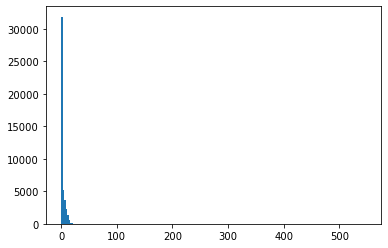

In [19]:
import pylab
pylab.hist(metadata_00.popularity[~np.isnan(metadata_00.popularity)], bins=200),

(array([2.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.050e+02, 0.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.300e+01, 5.000e+00, 0.000e+00, 0.000e+00,
        3.000e+01, 0.000e+00, 6.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        9.000e+00, 8.000e+00, 0.000e+00, 0.000e+00, 1.240e+02, 0.000e+00,
        1.600e+01, 0.000e+00, 2.000e+01, 4.500e+01, 0.000e+00, 1.900e+01,
        0.000e+00, 0.000e+00, 1.230e+02, 0.000e+00, 3.100e+01, 0.000e+00,
        4.400e+01, 6.800e+01, 0.000e+00, 4.000e+01, 0.000e+00, 0.000e+00,
        2.600e+02, 0.000e+00, 4.900e+01, 0.000e+00, 7.100e+01, 1.540e+02,
        0.000e+00, 1.000e+02, 0.000e+00, 0.000e+00, 2.580e+02, 0.000e+00,
        1.110e+02, 0.000e+00, 1.540e+02, 2.660e+02, 0.000e+00, 1.910e+02,
        0.000e+00, 0.000e+00, 6.850e+0

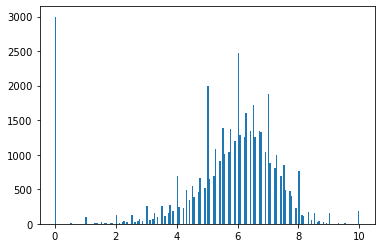

In [20]:
pylab.hist(metadata_00.vote_average[~np.isnan(metadata_00.vote_average)], bins=200)


(array([3.8003e+04, 2.5250e+03, 1.1100e+03, 6.4300e+02, 4.7800e+02,
        3.7800e+02, 2.4600e+02, 2.1500e+02, 1.7000e+02, 1.4400e+02,
        1.2200e+02, 9.4000e+01, 1.0700e+02, 9.0000e+01, 7.5000e+01,
        6.5000e+01, 5.6000e+01, 4.8000e+01, 4.5000e+01, 4.7000e+01,
        5.0000e+01, 4.0000e+01, 4.2000e+01, 3.6000e+01, 3.6000e+01,
        2.3000e+01, 2.6000e+01, 2.1000e+01, 2.2000e+01, 2.5000e+01,
        2.2000e+01, 9.0000e+00, 1.9000e+01, 2.4000e+01, 1.6000e+01,
        1.7000e+01, 1.5000e+01, 1.3000e+01, 1.0000e+01, 1.1000e+01,
        9.0000e+00, 1.0000e+01, 1.4000e+01, 1.5000e+01, 1.2000e+01,
        1.4000e+01, 5.0000e+00, 8.0000e+00, 8.0000e+00, 1.0000e+01,
        6.0000e+00, 4.0000e+00, 3.0000e+00, 4.0000e+00, 7.0000e+00,
        9.0000e+00, 7.0000e+00, 4.0000e+00, 6.0000e+00, 7.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00, 1.1000e+01,
        5.0000e+00, 4.0000e+00, 9.0000e+00, 3.0000e+00, 6.0000e+00,
        5.0000e+00, 1.0000e+00, 4.0000e+00, 2.00

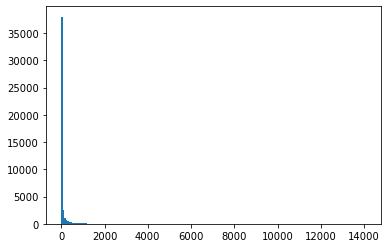

In [21]:
pylab.hist(metadata_00.vote_count[~np.isnan(metadata_00.vote_count)], bins=200)

La popularidad de las películas es una variable acotada con valor máximo de 547, y con el 75% de sus datos por debajo de 3.6; valor promedio de 2.9.

La votación por la película puede tener valores entre 0 y 10, con promedio de 5.6; lo que indica que en la base hay películas con poca y bastante preferencia.

En cuanto a la cantidad de personas que votan, el 75% de la películas tienen máximo 34 votos; con una cantidad máxima de votaciones de 14075 personas en algún título.


              popularity  vote_average  vote_count
popularity      1.000000      0.154399    0.559965
vote_average    0.154399      1.000000    0.123607
vote_count      0.559965      0.123607    1.000000


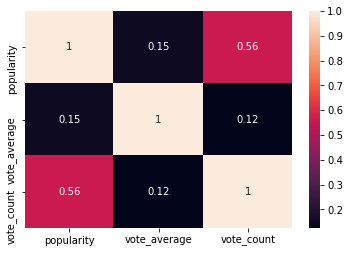

In [162]:
import seaborn as sn
X0 = metadata_00[['original_title','genres','popularity','vote_average','vote_count']].dropna()
X = metadata_00[['popularity','vote_average','vote_count']].dropna()
corrMatrix = X.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)

In [67]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [68]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_std) # obtener los componentes principales
X_pca=pca.transform(X_std)

In [75]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=X0['original_title'].values

pd.DataFrame(Xax).describe(include='all', percentiles = [0.001,0.05,0.1, 0.999])

,0
count,4.546000e+04
mean,1.212204e-15
std,1.273639e+00
min,-1.360051e+00
0.1%,-1.360051e+00
5%,-1.343769e+00
10%,-7.197996e-01
50%,-2.047702e-01
99.9%,1.336094e+01
max,6.791665e+01


In [111]:
Xax2 = Xax[Xax>25]
Yax2 = Yax[Xax>25]
labels2 = labels[Xax>25]

['Pulp Fiction' 'The Dark Knight' 'Avatar' 'The Avengers' 'Gone Girl'
 'John Wick' 'Big Hero 6' 'Deadpool' 'Guardians of the Galaxy Vol. 2'
 'Captain America: Civil War' 'Minions' 'Wonder Woman'
 'Beauty and the Beast' 'Baby Driver']


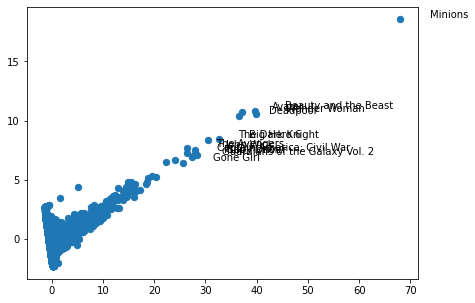

In [112]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
ax.scatter(Xax,Yax,label=labels,s=40)

for i,j,k in zip(Xax2,Yax2,range(len(labels2))):
    ax.annotate(labels2[k], xy=(i,j), xytext=(30,0), textcoords='offset points', va='bottom')
    
print(labels2)

In [114]:
X0.loc[list(Xax>25),:]

,original_title,popularity,vote_average,vote_count
292,Pulp Fiction,140.950236,8.3,8670.0
12481,The Dark Knight,123.167259,8.3,12269.0
14551,Avatar,185.070892,7.2,12114.0
17818,The Avengers,89.887648,7.4,12000.0
23675,Gone Girl,154.801009,7.9,6023.0
24351,John Wick,183.870374,7.0,5499.0
24455,Big Hero 6,213.849907,7.8,6289.0
26564,Deadpool,187.860492,7.4,11444.0
26566,Guardians of the Galaxy Vol. 2,185.330992,7.6,4858.0
26567,Captain America: Civil War,145.882135,7.1,7462.0


Utilizando un PCA para recolectar la información, garantizamos el uso de la mayor cantidad de información que ofrecen la popularidad, calificación y número de votos en una película.

En el primer componente encontramos que las películas con mayores valores presentan mayor popularidad, calificación y cantidad de votos.

### Ponderación entre rating y popularidad

Una opción puede consistir en ponderar el rating que recibe una película por su número de votos. De esta manera se pueden prevenir situaciones donde una película con un voto de 10 obtenga una mejor calificación que una película con 1000 votos con un promedio de 9.5.  

De esta manera, el voto promedio ponderado $\mu_i$, de la $i$-ésima película lo definimos como:

$$
\mu_i  = \left( \frac{v_i}{v_{max}} \right) R_i 
$$

donde $v_i$ es el número de votos para la $i$-ésima película, $v_{max}$ es el máximo número de votos que recibe la película más popular, y $R$ es el rating promedio de la pelicula.


En la base de datos tenemos los valores de $v_i$ (vote_count) y $R$ (vote_average) para cada pelicula. Además podemos agregar un filtro para que considere las películas con un minimo número de votos $v_{min}$.


Nos quedamos con las columnas necesarias para calcular el rating ponderado más el link de la pagina (en caso de que esté disponible):

In [118]:
pelisR = metadata[['original_title', 'homepage', 'vote_count', 'vote_average','popularity']]
pelisR.shape


(45466, 5)

In [119]:
# Calificacion de peliculas basada en la ponderacion de su rating 
def rating_ponderado(x):
    """
    Input:
    x: datos de rating y votacion de las peliculas
    m: minimo numero de votos
    Output:
    rating ponderado
    """
    m = x['vote_average'].max()
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) 

Definimos una nueva respuesta 'score' y calculamos su valor con la funcion rating_ponderado().

A continuación ordenamos las películas basados en el score y ofrecemos el top 15 de películas preferidas:

In [120]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

# si tiene al menos vmin votos, incluimos la pelicula
vmin = 1
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]
pelisRF['score'] = rating_ponderado(pelisRF)

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('score', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,homepage,vote_count,vote_average,score
10309,Dilwale Dulhania Le Jayenge,NaN,661.0,9.1,8.964382
314,The Shawshank Redemption,NaN,8358.0,8.5,8.489842
834,The Godfather,http://www.thegodfather.com/,6024.0,8.5,8.485913
40251,君の名は。,https://www.funimationfilms.com/movie/yourname/,1030.0,8.5,8.418269
39085,Planet Earth,NaN,176.0,8.8,8.326882
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,8.293240
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,8.291433
292,Pulp Fiction,NaN,8670.0,8.3,8.290438
522,Schindler's List,http://www.schindlerslist.com/,4436.0,8.3,8.281332
23673,Whiplash,http://sonyclassics.com/whiplash/,4376.0,8.3,8.281076


Examinemos el efecto de cambiar el mínimo numero de votos a considerar:

In [121]:
# si tiene al menos mil votos incluimos la pelicula
vmin = 1000
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]
pelisRF['score'] = rating_ponderado(pelisRF)

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('score', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,homepage,vote_count,vote_average,score
314,The Shawshank Redemption,NaN,8358.0,8.5,8.491364
834,The Godfather,http://www.thegodfather.com/,6024.0,8.5,8.488023
40251,君の名は。,https://www.funimationfilms.com/movie/yourname/,1030.0,8.5,8.430429
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,8.294254
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,8.292717
292,Pulp Fiction,NaN,8670.0,8.3,8.291871
522,Schindler's List,http://www.schindlerslist.com/,4436.0,8.3,8.284126
23673,Whiplash,http://sonyclassics.com/whiplash/,4376.0,8.3,8.283909
5481,千と千尋の神隠し,http://movies.disney.com/spirited-away,3968.0,8.3,8.282258
2211,La vita è bella,NaN,3643.0,8.3,8.280679


Veamos en qué consiste esa pelicula en japonés:

In [122]:
import webbrowser

webbrowser.open(pelisRF['homepage'][40251]) 

True

### Ejercicio 1.2

Examine cómo varían los resultados si tomamos directamente la variable de popularidad.

In [124]:
# si tiene al menos vmin votos, incluimos la pelicula
vmin = 1
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('popularity', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'popularity']].head(15)

,original_title,homepage,vote_count,vote_average,popularity
536,Blade Runner,http://www.warnerbros.com/blade-runner,3833.0,7.9,96.272374
3493,Dinosaur,NaN,563.0,6.2,9.998415
10517,Jarhead,NaN,776.0,6.6,9.997032
11252,The Last Kiss,NaN,125.0,5.9,9.996541
18029,Dream House,NaN,401.0,5.8,9.995617
1360,Hamlet,NaN,118.0,7.3,9.994088
12053,"4 luni, 3 săptămîni și 2 zile",NaN,158.0,7.4,9.990406
12488,Black Dawn,NaN,21.0,3.6,9.989719
25394,Black Sea,NaN,410.0,6.2,9.989679
5214,Hollywood Ending,NaN,114.0,6.4,9.987317


In [127]:
webbrowser.open(pelisRF['homepage'][20993]) 

True

Al utilizar la variable popularidad como score de la recomendación, nos encontramos con películas muy populares, pero con promedios de votos considerablemente bajos (3.6 o 4.3) y películas con número de votos igualmente bajos (21 o 48). Esto significa que la recomedación se estaría basando de la percepción de una población bastante particular, por ejemplo recomendar "The lords of Salem" una película con contenido no apto para personas sensibles por su temática paranormal y de terror, puede no ser la mejor recomendación para un público general. 

### Recomendación de peliculas mas populares por genero

In [128]:
import numpy as np
from ast import literal_eval

# trabajamos la informacion por generos
metadata['genres'] = metadata['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# añadimos la variable del año
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995


Primero nos quedamos con todos los generos:

In [129]:
generos = metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
generos.name = 'genre'
gen_md = metadata.drop('genres', axis=1).join(generos)

gen_md.head(3)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Family


Construimos una funcion para un género particular y que tome en cuenta peliculas con un número vmin de votos:

In [130]:
def rec_gen(genero, vmin):
    df = gen_md[gen_md['genre'] == genero]
    v = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    R = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    m = df['vote_average'].max()
    
    pelisG = df[(df['vote_count'] >= vmin) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'overview', 'homepage']]
    pelisG['vote_count'] = pelisG['vote_count'].astype('int')
    pelisG['vote_average'] = pelisG['vote_average'].astype('int')
    
    pelisG['wr'] = v/m * R
    pelisG = pelisG.sort_values('wr', ascending=False).head(250)
    
    return pelisG



Veamos el Top-15 de recomendaciones en Ciencia Ficción:

In [132]:
k = 15
scifi = rec_gen('Science Fiction', 1000)
scifi.head(k)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
15480,Inception,2010,14075,8,29.108149,"Cobb, a skilled thief who commits corporate es...",http://inceptionmovie.warnerbros.com/,11260.0
22879,Interstellar,2014,11187,8,32.213481,Interstellar chronicles the adventures of a gr...,http://www.interstellarmovie.net/,8949.6
14551,Avatar,2009,12114,7,185.070892,"In the 22nd century, a paraplegic Marine is di...",http://www.avatarmovie.com/,8479.8
17818,The Avengers,2012,12000,7,89.887648,When an unexpected enemy emerges and threatens...,http://marvel.com/avengers_movie/,8400.0
23753,Guardians of the Galaxy,2014,10014,7,53.291601,"Light years from Earth, 26 years after being a...",http://marvel.com/guardians,7009.8
26553,Mad Max: Fury Road,2015,9629,7,29.36178,An apocalyptic story set in the furthest reach...,http://www.madmaxmovie.com/,6740.3
2458,The Matrix,1999,9079,7,33.366332,"Set in the 22nd century, The Matrix tells the ...",http://www.warnerbros.com/matrix,6355.3
12588,Iron Man,2008,8951,7,22.073099,"After being held captive in an Afghan cave, bi...",http://www.ironmanmovie.com/,6265.7
18244,The Hunger Games,2012,9634,6,20.031667,Every year in the ruins of what was once North...,http://www.thehungergames.movie/,5780.4
26555,Star Wars: The Force Awakens,2015,7993,7,31.626013,Thirty years after defeating the Galactic Empi...,http://www.starwars.com/films/star-wars-episod...,5595.1


Inception e Interstellar aparecen en las dos primeras posiciones. Personalmente me gusta más Interstellar (si quieres ver un agujero negro, esta película es lo mejor que podrás conseguir), pero reconozco que Inception tiene mucho nivel. Podemos seguir refinando este tipo de recomendaciones prestando atención a los distintos atributos que tenemos disponibles sobre las películas. 


### Ejercicio 1.3

Elija el género de su interés y aplique la métrica propuesta en el Ejercicio 1.1

Para este ejercicio se seleccionará el género comedia ("Comedy"). En particular para la métrica propuesta en el notebook, la recomedación estaría compuesta por:


In [133]:
scifi = rec_gen('Comedy', 1000)
scifi.head(k)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
26564,Deadpool,2016,11444,7,187.860492,Deadpool tells the origin story of former Spec...,http://www.foxmovies.com/movies/deadpool,8010.8
351,Forrest Gump,1994,8147,8,48.307194,A man with a low IQ has accomplished great thi...,NaN,6517.6
1225,Back to the Future,1985,6239,8,25.778509,Eighties teenager Marty McFly is accidentally ...,http://www.backtothefuture.com/movies/backtoth...,4991.2
13724,Up,2009,7048,7,19.330884,Carl Fredricksen spent his entire life dreamin...,http://disney.go.com/disneypictures/up/,4933.6
22131,The Wolf of Wall Street,2013,6768,7,16.382422,A New York stockbroker refuses to cooperate in...,http://www.thewolfofwallstreet.com/,4737.6
30315,Inside Out,2015,6737,7,23.985587,"Growing up can be a bumpy road, and it's no ex...",http://movies.disney.com/inside-out,4715.9
13746,The Hangover,2009,6324,7,23.947351,When three friends finally come to after a rau...,http://hangoverpart2.warnerbros.com/dvd/,4426.8
24455,Big Hero 6,2014,6289,7,213.849907,The special bond that develops between plus-si...,http://movies.disney.com/big-hero-6,4402.3
18465,The Intouchables,2011,5410,8,16.086919,A true story of two men who should never have ...,NaN,4328.0
4756,"Monsters, Inc.",2001,6150,7,26.419962,"James Sullivan and Mike Wazowski are monsters,...",http://movies.disney.com/monsters-inc,4305.0


Existe contenido variado en esta recomedación, en primer lugar Deadpool es una película con bastante comedia pero que viene acompañada con un humor para adultos y contenido no apto para todo mundo.

In [195]:
X0 = metadata_00[['original_title','genres','popularity','vote_average','vote_count']].dropna()
X00 = metadata_00[['original_title','genres','popularity','vote_average','vote_count']].dropna()
X = metadata_00[['popularity','vote_average','vote_count']].dropna()

In [196]:
Titles=[]
for i in range(X0.shape[0]):
    Titles.append("Comedy" in X0.iloc[i,1])

In [197]:
X1 = X[Titles]
X01 = X00[Titles]

X_std = StandardScaler().fit_transform(X1)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_std) # obtener los componentes principales
X_pca=pca.transform(X_std)

Xax=X_pca[:,0]
Yax=X_pca[:,1]

In [199]:
X01['Score_New']=Xax

In [209]:
X01.nlargest(k,"Score_New")

,original_title,genres,popularity,vote_average,vote_count,Score_New
30700,Minions,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",547.488298,6.4,4729.0,61.313974
26564,Deadpool,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",187.860492,7.4,11444.0,37.524921
24455,Big Hero 6,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",213.849907,7.8,6289.0,31.449723
26566,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",185.330992,7.6,4858.0,26.203269
351,Forrest Gump,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",48.307194,8.2,8147.0,18.409159
26560,Pirates of the Caribbean: Dead Men Tell No Tales,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",133.827820,6.6,2814.0,17.529368
13724,Up,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",19.330884,7.8,7048.0,13.643208
30315,Inside Out,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",23.985587,7.9,6737.0,13.592688
1225,Back to the Future,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",25.778509,8.0,6239.0,12.945967
22131,The Wolf of Wall Street,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",16.382422,7.9,6768.0,12.898933


Utilizando la nueva métrica aparecen películas como Piratas del caribe o Minioms, que no serían recomedadas con la estrategia ponderada vista anteriormente. Aunque para las películas mencionadas anteriormente su género principal no sea comedia, serían recomendadas por este género.